<a href="https://colab.research.google.com/github/ArtyomShabunin/SMOPA/blob/main/lesson_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://prana-system.com/files/110/rds_color_full.png" alt="tot image" width="300"  align="center"/> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://mpei.ru/AboutUniverse/OficialInfo/Attributes/PublishingImages/logo1.jpg" alt="mpei image" width="200" align="center"/>
<img src="https://mpei.ru/Structure/Universe/tanpe/structure/tfhe/PublishingImages/tot.png" alt="tot image" width="100"  align="center"/>

---

# **Системы машинного обучения и предиктивной аналитики в тепловой и возобновляемой энергетике**  

# ***Практические занятия***


---

# Занятие №6
# Многоклассовая классификация методами машинного обучения
**26 марта 2025г.**

In [ ]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display, clear_output

## Загрузка данных

In [ ]:
import gdown
import warnings
warnings.filterwarnings('ignore')
gdown.download('https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ', verify=False)

data = pd.read_parquet("./data_modes.gzip")

Downloading...
From (original): https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ
From (redirected): https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ&confirm=t&uuid=d66b2c1e-56b7-455c-971a-f6e3ddc554e1
To: G:\Мой диск\SMOPA\data_modes.gzip
100%|███████████████████████████████████████████████████████████████████████████████| 173M/173M [01:17<00:00, 2.22MB/s]


In [ ]:
data.head()

,GTA1.DBinPU.Aldi,GTA1.DBinPU.Alvna,GTA1.DBinPU.Alzzo,GTA1.DBinPU.Bo,GTA1.DBinPU.DlPkf,GTA1.DBinPU.DlPtgft,GTA1.DBinPU.DlPvf,GTA1.DBinPU.fi,GTA1.DBinPU.hmGTD,GTA1.DBinPU.hmTG,...,heated_air,zzo_is_open,full_power_mode,partial_power_mode,increas_power_mode,decreas_power_mode,start_up_mode,shutdown_mode,stopped_state_mode,air_heating_mode
2023-02-26 06:59:50,225.550000,-4.398000,-0.082000,101.044,113.088000,33.709000,0.200000,56.615000,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:00,225.610769,-4.327115,-0.089769,101.044,113.151231,33.709000,0.200000,56.615000,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:10,225.436897,-4.363724,-0.091000,101.044,113.039759,33.633586,0.200207,56.516103,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:20,225.710833,-4.306625,-0.093000,101.044,113.053458,33.506500,0.200750,56.376000,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:30,226.355000,-4.183118,-0.091500,101.044,113.730941,33.818529,0.200000,56.199353,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False


## Сформируем датасет для решения задачи многоклассовой классификации

Сформируем отдельный целевой признак

In [ ]:
data['target'] = data[['full_power_mode', 'partial_power_mode',
       'increas_power_mode', 'decreas_power_mode', 'start_up_mode',
       'shutdown_mode', 'stopped_state_mode']].idxmax(axis=1)

In [ ]:
shuffled_data = data.sample(frac=1)

In [ ]:
shuffled_data['target'].value_counts()

target
full_power_mode       1045103
stopped_state_mode      26614
partial_power_mode       9547
shutdown_mode             347
start_up_mode             275
increas_power_mode        109
decreas_power_mode        103
Name: count, dtype: int64

Видно, что датасет сильно не сбалансирова, попробуем его немного выровнять путем сокращения данных по наиболее часто встречающимся режимам

In [ ]:
shuffled_data.drop(shuffled_data[shuffled_data['target'] == 'full_power_mode'].iloc[600:, :].index.tolist(), inplace=True)
shuffled_data.drop(shuffled_data[shuffled_data['target'] == 'stopped_state_mode'].iloc[600:, :].index.tolist(), inplace=True)
shuffled_data.drop(shuffled_data[shuffled_data['target'] == 'partial_power_mode'].iloc[600:, :].index.tolist(), inplace=True)

In [ ]:
shuffled_data['target'].value_counts()

target
full_power_mode       600
stopped_state_mode    600
partial_power_mode    600
shutdown_mode         347
start_up_mode         275
increas_power_mode    109
decreas_power_mode    103
Name: count, dtype: int64

Исключим из датасета все признаки на основании которы мы на предыдущем занятии выделяли режимы

In [ ]:
# used_signals = ['GTA1.DBinPU.ntk', 'GTA1.DBinPU.nst',
#                 'GTA1.DBinPU.P', 'GTA1.DBinPU.Alvna',
#                 'GTA1.DBinPU.Aldi']
# prepered_data = shuffled_data.loc[:, ~shuffled_data.columns.isin(used_signals)]

In [ ]:
# prepered_data.shape

(2416, 50)

Выберем сигналы которые будем использовать. Исключим все признаки на основании которых мы на предыдущем занятии выделяли целевые режимы.

In [ ]:
use_columns = ['GTA1.DBinPU.Alzzo', 'GTA1.DBinPU.Bo', 'GTA1.DBinPU.DlPkf',
               'GTA1.DBinPU.DlPtgft', 'GTA1.DBinPU.DlPvf', 'GTA1.DBinPU.fi',
               'GTA1.DBinPU.hmGTD', 'GTA1.DBinPU.hmTG', 'GTA1.DBinPU.P1mvhTG',
               'GTA1.DBinPU.Pk', 'GTA1.DBinPU.Pmvh', 'GTA1.DBinPU.PmvhMOGTD',
               'GTA1.DBinPU.PmvhMOTG', 'GTA1.DBinPU.PmvyhMOGTD',
               'GTA1.DBinPU.PmvyhMOTG', 'GTA1.DBinPU.Prazrjag_navhode',
               'GTA1.DBinPU.Ptgpd', 'GTA1.DBinPU.Ptgvh', 'GTA1.DBinPU.Pvh',
               'GTA1.DBinPU.Pvyhlg', 'GTA1.DBinPU.Qtg', 'GTA1.DBinPU.Tk',
               'GTA1.DBinPU.Tn', 'GTA1.DBinPU.Tt', 'GTA1.DBinPU.Tvh1',
               'GTA1.DBinPU.Pzad', 'target']

prepered_data = shuffled_data.loc[:,use_columns]

### Деление на обучающую и тестовую выборки

In [ ]:
data_train = prepered_data.iloc[:, :].reset_index(drop=True)

y_train = data_train.loc[:,['target']]
X_train =  data_train.drop(columns=['target'])

In [ ]:
X_train.head()

,GTA1.DBinPU.Alzzo,GTA1.DBinPU.Bo,GTA1.DBinPU.DlPkf,GTA1.DBinPU.DlPtgft,GTA1.DBinPU.DlPvf,GTA1.DBinPU.fi,GTA1.DBinPU.hmGTD,GTA1.DBinPU.hmTG,GTA1.DBinPU.P1mvhTG,GTA1.DBinPU.Pk,...,GTA1.DBinPU.Ptgpd,GTA1.DBinPU.Ptgvh,GTA1.DBinPU.Pvh,GTA1.DBinPU.Pvyhlg,GTA1.DBinPU.Qtg,GTA1.DBinPU.Tk,GTA1.DBinPU.Tn,GTA1.DBinPU.Tt,GTA1.DBinPU.Tvh1,GTA1.DBinPU.Pzad
0,0.088976,98.897610,166.299823,48.655220,0.221183,31.494817,458.721,459.693957,43.340354,0.801890,...,1.755317,1.875622,89.215366,2.283488,2245.200549,313.837195,19.470726,485.178963,18.982415,5850.0
1,-0.065952,100.693000,116.442619,35.422000,0.200000,51.739000,419.112,423.091000,45.019000,0.817000,...,1.822000,1.912000,91.185000,0.661000,1843.220000,276.200000,-5.343000,436.450000,-6.598000,5850.0
2,0.103178,99.536870,125.163945,36.283863,0.233541,65.846836,474.322,466.056000,44.459829,0.803548,...,1.826356,1.919575,89.810911,2.239753,1823.263630,314.902055,20.331055,486.493836,20.464089,5850.0
3,0.073850,101.290157,118.835586,37.544264,0.216600,22.735164,481.657,472.596929,45.281850,0.814000,...,1.806636,1.902000,91.661700,2.331621,1810.141429,308.517143,18.756000,478.878571,18.093679,5850.0
4,-0.014722,100.849835,118.863095,35.810835,0.204943,26.860905,388.220,395.582120,45.313570,0.816918,...,1.825000,1.920297,91.399304,2.366316,1840.298861,294.442405,7.065437,466.712975,6.303025,5850.0


### Нормализация или стандартизация данных

In [ ]:
# scaler = preprocessing.MinMaxScaler() # нормализация данных
scaler = preprocessing.StandardScaler() # стандартизация данных

X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index)

X_train.describe()

,GTA1.DBinPU.Alzzo,GTA1.DBinPU.Bo,GTA1.DBinPU.DlPkf,GTA1.DBinPU.DlPtgft,GTA1.DBinPU.DlPvf,GTA1.DBinPU.fi,GTA1.DBinPU.hmGTD,GTA1.DBinPU.hmTG,GTA1.DBinPU.P1mvhTG,GTA1.DBinPU.Pk,...,GTA1.DBinPU.Ptgpd,GTA1.DBinPU.Ptgvh,GTA1.DBinPU.Pvh,GTA1.DBinPU.Pvyhlg,GTA1.DBinPU.Qtg,GTA1.DBinPU.Tk,GTA1.DBinPU.Tn,GTA1.DBinPU.Tt,GTA1.DBinPU.Tvh1,GTA1.DBinPU.Pzad
count,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,...,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03,2.634000e+03
mean,1.618548e-17,1.182619e-14,2.373871e-16,4.316129e-17,-1.079032e-16,1.402742e-16,1.278653e-15,-7.661129e-16,-2.805484e-16,1.079032e-16,...,1.079032e-17,-1.294839e-16,6.042581e-16,-1.079032e-17,3.237097e-17,2.158064e-17,-6.474193e-17,6.474193e-17,-1.079032e-16,-6.474193e-17
std,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,...,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00,1.000190e+00
min,-1.726360e-01,-3.470233e+00,-1.135012e+00,-1.146167e+00,-1.129967e+00,-1.823652e+00,-1.403247e+00,-1.563028e+00,-1.902613e+00,-1.115309e+00,...,-1.276858e+00,-1.341018e+00,-1.950002e+00,-1.007649e+00,-1.121369e+00,-1.219019e+00,-3.211005e+00,-1.345314e+00,-3.573440e+00,-1.036910e+00
25%,-1.629784e-01,-7.649348e-01,-1.110155e+00,-1.049917e+00,-1.099016e+00,-8.741541e-01,-1.038893e+00,-7.692991e-01,1.734817e-01,-1.109069e+00,...,-1.273439e+00,-1.338735e+00,-1.045576e+00,-9.144037e-01,-1.121307e+00,-1.172414e+00,-6.777497e-01,-1.315402e+00,-5.536304e-01,-1.036910e+00
50%,-1.596997e-01,2.563228e-01,6.973047e-02,-7.338727e-02,2.189579e-01,-1.957790e-01,-1.478057e-01,5.898848e-02,5.074863e-01,3.518769e-01,...,7.131038e-01,7.089467e-01,2.792567e-02,-4.420536e-01,2.840005e-01,5.728735e-01,-5.810178e-02,5.835001e-01,-5.337518e-02,7.842354e-02
75%,-1.564628e-01,7.339399e-01,9.471540e-01,1.018660e+00,9.750215e-01,6.849090e-01,5.738493e-01,4.622368e-01,6.033969e-01,1.051771e+00,...,7.732887e-01,7.551970e-01,1.054741e+00,1.165614e+00,9.952384e-01,9.396049e-01,6.919261e-01,8.275112e-01,8.357963e-01,1.136953e+00
max,6.639898e+00,2.882629e+00,1.736850e+00,4.093414e+00,1.567700e+00,2.321527e+00,2.506252e+00,2.270199e+00,1.002223e+00,1.174726e+00,...,9.800960e-01,9.201976e-01,1.213767e+00,1.721954e+00,1.493455e+00,1.291318e+00,2.348531e+00,1.324712e+00,2.292033e+00,1.194309e+00


Инициализируем переменные для дальнейшего сравнения моделей

In [ ]:
accuracy_classifier = {}
precision_classifier = {}
recall_classifier = {}
f1_classifier = {}

Вот исправленный и дополненный вариант текста:  

---

Метод опорных векторов изначально предназначен для бинарной классификации, однако существуют способы адаптации его для решения задач многоклассовой классификации.  

Один из таких подходов — стратегия **"один против всех"** (*one-versus-all*, OvA), также известная как **"один против остальных"** (*one-versus-the-rest*). В этом случае обучается $N$ бинарных классификаторов, по одному для каждого класса. Во время предсказания выбирается класс с наивысшим значением функции принятия решения.  

Другой подход — **"один против одного"** (*one-versus-one*, OvO), при котором для каждой пары классов обучается отдельный бинарный классификатор. Таким образом, для $N$ классов требуется обучить $\frac{N(N - 1)}{2}$ классификаторов. Преимущество этого метода в том, что каждый классификатор тренируется только на подмножестве данных, относящихся к двум соответствующим классам.  

Метод опорных векторов плохо масштабируется при увеличении объема обучающего набора, поэтому стратегия **OvO часто предпочтительнее**: проще и быстрее обучить множество небольших классификаторов, чем несколько моделей, использующих полный набор данных. Однако для большинства бинарных алгоритмов стратегия **OvA является более естественной**, поскольку в ней каждая модель учитывает все данные и их принадлежность к конкретному классу.  

### Рекомендации по выбору стратегии:
- **OvO**  
  - Лучше для моделей, плохо масштабируемых с ростом данных (например, SVM с нелинейными ядрами).  
  - Эффективна при **большом количестве классов**, так как каждый классификатор использует только малую часть данных.  
  - Может быть избыточна при небольшом числе классов.  

- **OvR**  
  - Подходит, если алгоритм **хорошо масштабируется** с данными (например, `LogisticRegression`, `RandomForest`).  
  - Применяется, когда **классов немного**, чтобы избежать чрезмерного количества моделей.  
  - Может работать лучше, если один класс является **доминирующим** (например, задачи выявления аномалий).  

Выбор стратегии зависит от конкретных данных и требований к модели. Если данных много и используется метод SVM, чаще всего предпочтительнее OvO. Если же данных не так много или алгоритм легко масштабируется, стоит попробовать OvA.

In [ ]:
kernel = widgets.Dropdown(
    options=['linear', 'poly', 'rbf', 'sigmoid'],
    value='rbf',
    description='Kernel:',
    disabled=False,
)

strategy = widgets.Dropdown(
    options=['ovo', 'ovr'],
    value='ovr',
    description='Strategy:',
    disabled=False,
)

widgets.VBox([
    widgets.Label('Тип ядра, который будет использоваться в алгоритме'),
    kernel,
    widgets.Label('Стратегия'),
    strategy])

In [ ]:
svm_clf = SVC(gamma="auto", random_state=42,
              decision_function_shape=strategy.value,
              kernel = kernel.value)
svm_clf.fit(X_train, y_train)

SVC(gamma='auto', random_state=42)

In [ ]:
some_index = X_train.sample().index

X_some_mode = X_train.iloc[some_index]
y_some_mode = y_train.iloc[some_index]

print(f"Предсказание {svm_clf.predict(X_some_mode)}")
print(f"Правда {y_some_mode}")

Предсказание ['full_power_mode']
Правда              target
10  full_power_mode


Метод **`decision_function()`** в `SVC` из `sklearn` возвращает оценку степени принадлежности объекта к определенному классу. Эта оценка называется **отступом (margin)** и представляет собой расстояние до разделяющей гиперплоскости в пространстве признаков.  

**Для многоклассовой классификации** (`n_classes > 2`):  
   - Если используется стратегия **"Один-против-одного" (OvO, по умолчанию в `SVC`)**, то метод возвращает массив размерности `(n_samples, n_classes * (n_classes - 1) / 2)`, где каждая колонка соответствует предсказанному отступу для одной из пар классов. Итоговый класс определяется голосованием.  
   - Если используется стратегия **"Один-против-всех" (OvR, при использовании `OneVsRestClassifier`)**, то метод возвращает массив размерности `(n_samples, n_classes)`, где каждое значение — это отступ для соответствующего класса.

In [ ]:
some_mode_scores = svm_clf.decision_function(X_some_mode)
some_mode_scores

array([[ 4.08483147,  2.87530862,  5.27795539,  6.28820728,  0.74058853,
         1.77990853, -0.28355891]])

In [ ]:
svm_clf.classes_

array(['decreas_power_mode', 'full_power_mode', 'increas_power_mode',
       'partial_power_mode', 'shutdown_mode', 'start_up_mode',
       'stopped_state_mode'], dtype=object)

### Анализ качества модели опорных векторов

**Кросс-валидация (Cross-Validation, CV)** – это метод **оценки качества модели**, который используется для проверки её обобщающей способности.  

**Основная идея:**  
- Данные делятся на **обучающую** и **тестовую** выборку **не один раз**, а **несколько**.  
- Модель обучается на **разных частях данных** и тестируется на оставшихся.  
- Это помогает **избежать переобучения** и получить более **надежную оценку качества модели**.  

В случае, когда в задаче **многоклассовой классификации** некоторые классы **встречаются реже других**, стандартная кросс-валидация **(KFold, StratifiedKFold)** может привести к ситуации, когда в некоторых фолдах тестовая выборка не содержит примеры редких классов. Это может **исказить оценку модели**, так как:  

- **Модель не учится на редких классах** из-за нехватки данных в обучающих фолдах.  
- **Некоторые классы вообще не присутствуют в тесте**, что делает метрики, такие как `accuracy`, необъективными.  

---



**`StratifiedKFold`**  
Этот метод **разбивает данные так, чтобы пропорции классов сохранялись в каждом фолде**, уменьшая вероятность выпадения редких классов.  

**Но** если у какого-то класса **слишком мало примеров** (например, всего 2-3), он все равно может не попасть в тестовый фолд.


Метод **`cross_val_predict`** выполняет **кросс-валидацию** и возвращает **предсказания** для каждого объекта на основе моделей, обученных на разных разбиениях данных.

In [ ]:
svm_clf_eval = SVC(
    gamma="auto", random_state=42,
    decision_function_shape=strategy.value,
    kernel = kernel.value)
# Создаем стратифицированную кросс-валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Получаем предсказания с кросс-валидацией
y_train_pred_svm = cross_val_predict(svm_clf_eval, X_train, y_train, cv=skf)

#### Матрица неточностей

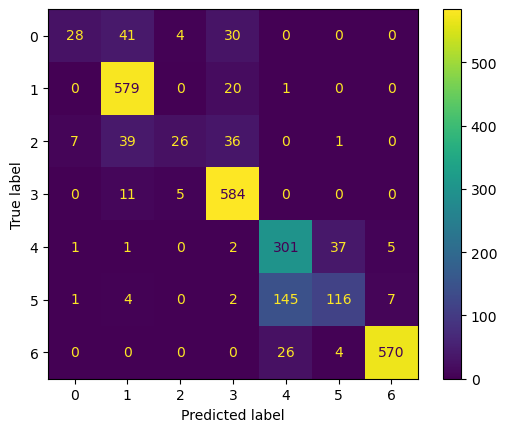

In [ ]:
conf_mat = confusion_matrix(y_train, y_train_pred_svm)
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

#### Accuracy

In [ ]:
accuracy_classifier['svm'] = accuracy_score(y_train, y_train_pred_svm)

#### Precision и recall

In [ ]:
precision_classifier['svm'] = precision_score(y_train, y_train_pred_svm, average='macro', zero_division = np.nan)
recall_classifier['svm'] = recall_score(y_train, y_train_pred_svm, average='macro', zero_division = np.nan)

#### F1

In [ ]:
f1_classifier['svm'] = f1_score(y_train, y_train_pred_svm, average='macro', zero_division = np.nan)

#### Значения метрик

In [ ]:
print(f"accuracy - {accuracy_classifier['svm']*100:0.2f}%")
print(f"precision - {precision_classifier['svm']*100:0.2f}%")
print(f"recall - {recall_classifier['svm']*100:0.2f}%")
print(f"F1 - {f1_classifier['svm']*100:0.2f}%")

accuracy - 83.68%
precision - 79.63%
recall - 66.97%
F1 - 68.87%


## Метод ближайших соседей (K-Nearest Neighbors, KNN)

**Метод k-ближайших соседей (KNN)** – это простой и эффективный алгоритм **классификации** и **регрессии**, основанный на **поиске ближайших точек** в пространстве признаков.  

**Основная идея:**  
1. Для нового объекта **ищутся K ближайших точек** (соседей) в обучающей выборке.  
2. Класс объекта определяется **по большинству** среди соседей.   

---

**Как работает KNN?**  

**Выбираем количество соседей (K)**  
- Маленькое K → модель **чувствительна** к шуму (может переобучаться).  
- Большое K → модель становится **более устойчивой**, но может терять точность.  

**Вычисляем расстояния между точками**  
- **Евклидово расстояние** (стандартный вариант):  
$$ d(A, B) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} $$
- Можно использовать и другие метрики: **Манхэттенское, Косинусное, Чебышёва**.  

**Определяем класс нового объекта**  
- Берем K ближайших точек и **голосуем за класс** (большинство решает).  
- Если **регрессия** – усредняем значения.  

---

**Преимущества и недостатки KNN**  

**Плюсы:**  
**Простота** – не требует сложного обучения.  
**Гибкость** – можно менять метрики и K.  
**Хорошо работает при малых данных**.  

**Минусы:**  
**Медленный при больших данных** – O(N) сложность поиска соседей.  
**Чувствителен к шуму** при малых K.  
**Плохо работает с высокой размерностью** (проклятие размерности).  

---

Метод ближайших соседей **хорош для небольших данных** и **прост в реализации**, но **плохо масштабируется**.  
Лучше работает при **малом количестве признаков** и **нормализованных данных**.

In [ ]:
n_neighbors = widgets.IntSlider(
    value=5, min=1, max=10, step=1, description="Число соседей:")
display(n_neighbors)

IntSlider(value=5, description='Число соседей:', max=10, min=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors.value)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
some_index = X_train.sample().index

X_some_mode = X_train.iloc[some_index]
y_some_mode = y_train.iloc[some_index]

print(f"Предсказание {knn_clf.predict(X_some_mode)}")
print(f"Правда {y_some_mode}")

Предсказание ['stopped_state_mode']
Правда                   target
1282  stopped_state_mode


### Анализ качества модели ближайших соседей

In [ ]:
knn_clf_eval = KNeighborsClassifier(n_neighbors=n_neighbors.value)
# Создаем стратифицированную кросс-валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Получаем предсказания с кросс-валидацией
y_train_pred_knn = cross_val_predict(knn_clf_eval, X_train, y_train, cv=skf)

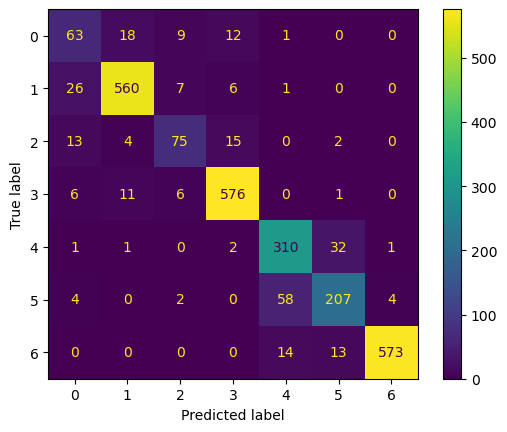

In [ ]:
conf_mat = confusion_matrix(y_train, y_train_pred_knn)
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

#### Accuracy

In [ ]:
accuracy_classifier['knn'] = accuracy_score(y_train, y_train_pred_knn)

#### Precision и recall

In [ ]:
precision_classifier['knn'] = precision_score(y_train, y_train_pred_knn, average='macro', zero_division = np.nan)
recall_classifier['knn'] = recall_score(y_train, y_train_pred_knn, average='macro', zero_division = np.nan)

#### F1

In [ ]:
f1_classifier['knn'] = f1_score(y_train, y_train_pred_knn, average='macro', zero_division = np.nan)

#### Значения метрик

In [ ]:
print(f"accuracy - {accuracy_classifier['knn']*100:0.2f}%")
print(f"precision - {precision_classifier['knn']*100:0.2f}%")
print(f"recall - {recall_classifier['knn']*100:0.2f}%")
print(f"F1 - {f1_classifier['knn']*100:0.2f}%")

accuracy - 89.75%
precision - 83.01%
recall - 82.77%
F1 - 82.80%


## Случайный лес (Random Forest)

**Случайный лес (Random Forest)** – это ансамблевый алгоритм машинного обучения, который строит **множество деревьев решений** и объединяет их предсказания. Он используется как для **классификации**, так и для **регрессии**.  

**Основная идея** – создать несколько деревьев решений и усреднять их предсказания, чтобы модель была **более точной и устойчивой**.  

---

**Как работает случайный лес?**  
**Создание множества деревьев решений**  
- Каждое дерево строится на **случайной подвыборке** данных (bagging).  
- Для каждого разбиения в узле дерева выбирается **случайное подмножество признаков**.  

**Обучение деревьев независимо друг от друга**  
- В отличие от градиентного бустинга, деревья **не зависят друг от друга**.  
- Это делает алгоритм **быстрым в обучении** и **устойчивым к переобучению**.  

**Объединение предсказаний**  
- В **классификации** – голосование большинства (majority voting).  

**Когда использовать Random Forest?**  
Когда нужна **высокая точность**.  
Когда данные **шумные** или **содержат выбросы**.  
Когда важна **устойчивость модели** к переобучению.  
Когда нужно **оценить важность признаков**.  

**Когда НЕ использовать?**  
Если нужны **интерпретируемые модели** – сложно понять, как именно модель принимает решение.  
Если важна **скорость предсказаний** – например, для реального времени.  

---

**Random Forest** – мощный алгоритм, который отлично работает на большинстве задач машинного обучения. Он особенно полезен, когда нужна **высокая точность**, а данные **сложные и шумные**.

In [ ]:
n_estimators = widgets.IntSlider(
    value=100, min=1, max=500, step=1, description="Число деревьев:")
display(n_estimators)

IntSlider(value=100, description='Число деревьев:', max=500, min=1)

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=n_estimators.value, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
some_index = X_train.sample().index

X_some_mode = X_train.iloc[some_index]
y_some_mode = y_train.iloc[some_index]

print(f"Предсказание {forest_clf.predict(X_some_mode)}")
print(f"Правда {y_some_mode}")

Предсказание ['shutdown_mode']
Правда              target
2262  shutdown_mode


### Анализ качества модели случайного леса

In [ ]:
forest_clf_eval = RandomForestClassifier(n_estimators=n_estimators.value, random_state=42)
# Создаем стратифицированную кросс-валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Получаем предсказания с кросс-валидацией
y_train_pred_forest = cross_val_predict(forest_clf_eval, X_train, y_train, cv=skf)

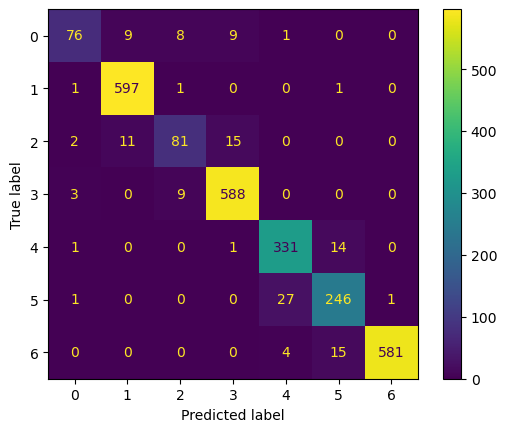

In [ ]:
conf_mat = confusion_matrix(y_train, y_train_pred_forest)
ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

#### Accuracy

In [ ]:
accuracy_classifier['forest'] = accuracy_score(y_train, y_train_pred_forest)

#### Precision и recall

In [ ]:
precision_classifier['forest'] = precision_score(y_train, y_train_pred_forest, average='macro', zero_division = np.nan)
recall_classifier['forest'] = recall_score(y_train, y_train_pred_forest, average='macro', zero_division = np.nan)

#### F1

In [ ]:
f1_classifier['forest'] = f1_score(y_train, y_train_pred_forest, average='macro', zero_division = np.nan)

#### Значения метрик

In [ ]:
print(f"accuracy - {accuracy_classifier['forest']*100:0.2f}%")
print(f"precision - {precision_classifier['forest']*100:0.2f}%")
print(f"recall - {recall_classifier['forest']*100:0.2f}%")
print(f"F1 - {f1_classifier['forest']*100:0.2f}%")

accuracy - 94.61%
precision - 91.68%
recall - 89.24%
F1 - 90.32%


## Сравнение

In [ ]:
precision_classifier

{'svm': np.float64(0.7962546878534467),
 'knn': np.float64(0.8301402193369797),
 'forest': np.float64(0.9168157389258585)}

In [ ]:
recall_classifier

{'svm': np.float64(0.6697090634198392),
 'knn': np.float64(0.8277366062739978),
 'forest': np.float64(0.8924486354154271)}

In [ ]:
f1_classifier

{'svm': np.float64(0.6886505723911461),
 'knn': np.float64(0.8279873097642854),
 'forest': np.float64(0.9032224715212009)}

In [ ]:
accuracy_classifier

{'svm': 0.89749430523918,
 'knn': 0.89749430523918,
 'forest': 0.9460895975702354}